# TP 5 : Réseaux de Neurones en tensorflow

**Avant de commencer :** Merci de bien lire le préambule et l'énoncé de ce TP. Ça vous évitera de perdre beaucoup de temps ensuite. 

**Rendu :** Ce TP doit être déposé sur elearning avant le 23 novembre 2022, 23h59. Le rendu doit contenir uniquement le fichier `.ipynb`. Le notebook doit être propre, le plus illustré et le plus commenté possible. 

**Librairies :** Ce TP repose sur les librairies standard suivantes :
- Version numpy : 1.23.1
- Version matplotlib : 3.5.2
- Version tensorflow : 2.8.2

Pour vérifier qu'elles sont bien installées dans votre environnement de travail, lancez la cellule suivante. Elle ne doit pas renvoyer d'erreur (un `Warning` n'est en général pas trop embêtant). 

Pour les numéros _exacts_ de version, ce n'est pas très grave s'il y a une petite différence (par exemple `numpy 1.22` au lieu de `1.23`), mais si vous avez une trop grosse différence (par exemple `sklearn 0.23` au lieu de `sklearn 1.1`), mettez à jour votre librairie. 

S'il vous manque une librairie (`No module named ...`), vous pouvez l'installer 
- Soit en utilisant votre gestionnaire d'environnement (p.ex. `conda`). 
- Soit directement depuis le notebook, en faisant
```
!pip install nom_de_la_librairie==numero_de_la_version
```

**Attention :** Pour installer tensorflow, vous pouvez _a priori_ faire `pip install tensorflow`, mais en cas de doute, vous pouvez regarder [la doc d'installation](https://www.tensorflow.org/install/pip?hl=fr).

Pour `tensorflow`, assurez-vous de bien avoir la version `2.` (la suite ne devrait pas avoir trop d'importance). 

Note : la première fois que vous lancer `import tensorflow as tf`, ça peut prendre assez longtemps (apparemment des choses sont compilées en C en arrière plan). 

In [26]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf

from utils_tp5 import *

print("Version numpy :", np.__version__)
print("Version matplotlib :", matplotlib.__version__)
print("Version tensorflow :", tf.__version__)

Version numpy : 1.19.5
Version matplotlib : 3.3.4
Version tensorflow : 2.6.2


## Partie 1 : premiers modèles en tensorflow

Le but de cette partie est de vous faire créer des modèles simples en `tensorflow` et en `pytorch`, les deux librairies de références en _Deep Learning_, et de mettre en place les routines pour entraîner de tels modèles en fonction des deux librairies. 

### Jeux de données

On commence par se fabriquer deux jeux de données sur lesquels on testera nos modèles de Deep Learning : un jeu de régression, et un jeu de classification. Les fonctions pour faire ça sont dans un fichier `utils_tp5.py` que vous n'êtes pas obligés d'ouvrir. 

In [27]:
x_reg_train, y_reg_train, x_reg_test, y_reg_test = generate_regression_task()
x_classif_train, y_classif_train, x_classif_test, y_classif_test = generate_classification_task()

On visualise ça. 

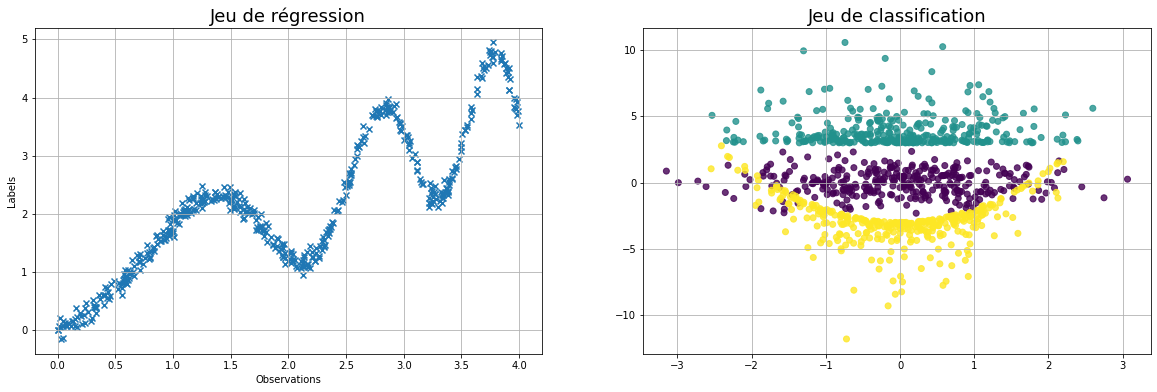

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

ax = axs[0]

ax.scatter(x_reg_train, y_reg_train, marker='x')
ax.set_xlabel("Observations")
ax.set_ylabel("Labels")
ax.set_title("Jeu de régression", fontsize=18)
ax.grid()

ax = axs[1]
ax.scatter(x_classif_train[:,0], x_classif_train[:,1], c=y_classif_train, alpha=0.8)
ax.set_title("Jeu de classification", fontsize=18)
ax.grid()

### Régression en tensorflow

**Question 1: Construction du modèle.** Remplir le code suivant pour créer un modèle `tensorflow` pour le jeu de classification de la manière suivante : 

- Le modèle prend les entrées du jeu de régression (1D) et utilise un fully-connected (`Dense`) pour les plonger en dimension 3, avec une activation `relu`
- Le modèle fait une autre couche qui va de la dimension 3 à a dimension 5, avec une `relu` encore. 
- Le modèle remet ensuite les données en dimension 1 (la dimension des labels), avec une activation `linear` (ce qui revient à prendre $\sigma = \mathrm{id}$). 

_Indications:_ On utilisera la syntaxe 
```
tf.keras.layers.Dense(units, activation)
```
où `units` et la dimension de _sortie_ du layer, et `activation` est le choix de la fonction d'activation $\sigma$, qui peut valoir `'relu'`, `'sigmoid'` ou `'softmax'` par exemple. 

Pour le premier layer, on ajoutera le paramètre `input_shape = (1,)`, pour préciser que l'entrée du modèle sera en 1D (attention, la syntaxe est un peu pénible : `tensorflow` demande un itérable (une liste, un tuple, etc.), donc on est obligé de mettre `(1,)` et pas simplement `1`). 

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3,activation='relu',input_shape=(1,)),   # mettez ici le premier layer
    tf.keras.layers.Dense(5,activation='relu'),   # ici le second layer
    tf.keras.layers.Dense(1,activation ='linear')   # ici le troisième et dernier layer. 
])

---

**Compilation du modèle.** Avant exécution, les modèles tensorflow doivent être "compilés", grâce à la méthode `model.compile(optimizer, loss, metrics)`. On va alors préciser 
- `optimizer` : le choix de l'algorithme d'optimisation. On prendra `'adam'`, un grand classique pour faire une déscente de gradient stochastique
- `loss` : le choix de la _loss function_. On prendra la _mean squared error_ (mse), qu'on peut fixer en mettant le paramètre `loss` à `'mse'`.
- `metrics` : la quantité qui nous intéresse. On prendra ici aussi la `'mse'` (voir la partie sur la classification pour comprendre la différence). 

In [5]:
model.compile(
    optimizer='adam', 
    loss='mse', 
    metrics=['mse']
)

**Question 2: Résumé du modèle.** Après avoir lancé la cellule précédente (compilation du modèle), appeler la méthode `model.summary()` pour répondre aux questions suivantes : 
- Combien votre modèle a-t-il de paramètres ? 
- Sauriez-vous justifier ce nombre par le calcul ? 

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


Le model contient 32 parametres
dense_8 + dense_9 + dense_10 = Total params<br>
sachant que :<br>
 dense_8 = 6<br>
 dense_9 = 20<br>
 dense_10 = 6<br>
On a :<br>
 6 + 20 + 6 = 32

**Question 4 : Entraîner le modèle.** En utilisant la méthode `model.fit(x_train, y_train, epochs)`, entraîner le modèle sur votre jeu de régression. On rappelle que `epochs` indique le nombre de parcours _complet_ du jeu de données que vous voulez faire lors de votre Descente de Gradient Stochastique (par batch). 

On prendra 5 epochs pour commencer. 

In [7]:
model.fit(x_reg_train,y_reg_train,epochs=5)

Epoch 1/5
16/16 [==============================] - 0s 982us/step - loss: 5.9357 - mse: 5.9357
Epoch 2/5
16/16 [==============================] - 0s 1ms/step - loss: 5.8031 - mse: 5.8031
Epoch 3/5
16/16 [==============================] - 0s 997us/step - loss: 5.6957 - mse: 5.6957
Epoch 4/5
16/16 [==============================] - 0s 937us/step - loss: 5.6078 - mse: 5.6078
Epoch 5/5
16/16 [==============================] - 0s 900us/step - loss: 5.5235 - mse: 5.5235


---

**Question 5: Évaluer le modèle.** Tester la performance de votre model avec la méthode `model.evaluate(x_test, y_test)`. On ajoutera comme paramètre à la méthode, `verbose = 2` (qui permet d'avoir directement + de renseignements). 

Commentez brièvement les résultats obtenus. 

In [8]:
model.evaluate(x_reg_test,y_reg_test,verbose=2)

7/7 - 0s - loss: 5.7966 - mse: 5.7966


[5.796574115753174, 5.796574115753174]

La loss et la mse est plus faible que lors du ``model.fit()``

---

**Visualiser le modèle.** Comme on est en basse dimension (observations et labels de dimension 1), on peut visualiser "globalement" les prédictions que ferait notre modèle en générant "toutes" les observations possibles en 1D susceptibles de nous intéresser. 

Concrètement, on va échantillonner l'intervalle $[0, 4]$ (raisonnable vues nos observations), puis on regarde les prédictions du modèle avec `model.predict(x)`. 

**Question 6:** Exécutez le code suivant puis commentez le résultat obtenu. 

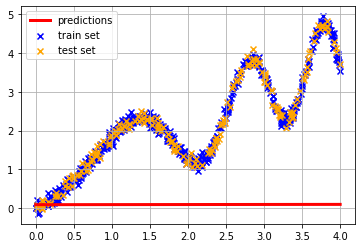

In [9]:
t = np.linspace(0, 4, 10000)  # on fabrique "tout" l'intervalle

pred = model.predict(t)

fig, ax = plt.subplots()
ax.plot(t, pred, c='red', label='predictions', linewidth = 3)
ax.scatter(x_reg_train, y_reg_train, marker='x', label='train set', c='blue')
ax.scatter(x_reg_test, y_reg_test, marker='x', label='test set', c='orange')
ax.legend()
ax.grid()

En lanceant plusieurs fois tout le notebook on remarque que les prédictions du model peuvent varier, cependant plus la losse se rapproche de zéro plus le model suit la courbe.

---

**Question 7:** Relancer l'entraînement du modèle en faisant + d'epochs, et (en faisant un copier-coller) relancez le code de la cellule précédente pour visualiser notre modèle "mieux entraîné". 

Commentez le résultat obtenu.

_Remarque:_ Un point assez pratique avec `tensorflow` et qu'on peut simplement "reprendre" l'entraînement en relançant `model.fit(..., epoch=...)`: l'objet `model` est conservé, donc si vous lancez deux fois la cellule `model.fit(..., epoch = 5)`, c'est comme si vous aviez fait 10 epochs. Par contre, si vous relancez `model = ...` (ou si vous redémarrez votre notebook), vous remettez le modèle à 0 bien entendu. 

_Remarque 2:_ Il se peut que votre modèle "stagne" près de la fonction nulle. Dans ce cas, relancez-le "depuis 0". 

In [10]:
model.fit(x_reg_train,y_reg_train,epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 1ms/step - loss: 5.4336 - mse: 5.4336
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 5.3365 - mse: 5.3365
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 5.2306 - mse: 5.2306
Epoch 4/100
16/16 [==============================] - 0s 875us/step - loss: 5.1117 - mse: 5.1117
Epoch 5/100
16/16 [==============================] - 0s 892us/step - loss: 4.9771 - mse: 4.9771
Epoch 6/100
16/16 [==============================] - 0s 923us/step - loss: 4.8218 - mse: 4.8218
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 4.6420 - mse: 4.6420
Epoch 8/100
16/16 [==============================] - 0s 917us/step - loss: 4.4331 - mse: 4.4331
Epoch 9/100
16/16 [==============================] - 0s 944us/step - loss: 4.1953 - mse: 4.1953
Epoch 10/100
16/16 [==============================] - 0s 922us/step - loss: 3.9331 - mse: 3.9331
Epoch 11/100
16/16 [===========================

16/16 [==============================] - 0s 931us/step - loss: 0.4412 - mse: 0.4412
Epoch 86/100
16/16 [==============================] - 0s 982us/step - loss: 0.4401 - mse: 0.4401
Epoch 87/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4389 - mse: 0.4389
Epoch 88/100
16/16 [==============================] - ETA: 0s - loss: 0.4156 - mse: 0.415 - 0s 941us/step - loss: 0.4380 - mse: 0.4380
Epoch 89/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4372 - mse: 0.4372
Epoch 90/100
16/16 [==============================] - 0s 975us/step - loss: 0.4363 - mse: 0.4363
Epoch 91/100
16/16 [==============================] - 0s 965us/step - loss: 0.4354 - mse: 0.4354
Epoch 92/100
16/16 [==============================] - 0s 871us/step - loss: 0.4345 - mse: 0.4345
Epoch 93/100
16/16 [==============================] - 0s 796us/step - loss: 0.4338 - mse: 0.4338
Epoch 94/100
16/16 [==============================] - 0s 845us/step - loss: 0.4328 - mse: 0.4328
Epoch 95/

In [11]:
model.evaluate(x_reg_test,y_reg_test,verbose=2)

7/7 - 0s - loss: 0.4032 - mse: 0.4032


[0.4032110273838043, 0.4032110273838043]

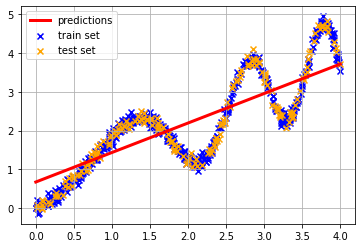

In [12]:
t = np.linspace(0, 4, 10000)  # on fabrique "tout" l'intervalle

pred = model.predict(t)

fig, ax = plt.subplots()
ax.plot(t, pred, c='red', label='predictions', linewidth = 3)
ax.scatter(x_reg_train, y_reg_train, marker='x', label='train set', c='blue')
ax.scatter(x_reg_test, y_reg_test, marker='x', label='test set', c='orange')
ax.legend()
ax.grid()

Le model deviens plus précis avec plus d'epoch

---

_A priori_, votre modèle est toujours assez mauvais. Ce n'était donc pas une question de nombre d'epochs, mais véritablement d'expressivité du modèle : notre réseau est trop simple. 

**Question 8;** Fabriquer un nouveau réseau de neurones (appelez-le par exemple `model2`) similaire au précédent, mais en augmentant son expressivité via : 
- plus de neurones dans les layers intermédiaires
- plus de layers intermédiaires
- augmenter le nombre d'epochs si besoin

Reprendre ensuite les questions précédentes, en particulier :
- Décrire le nombre de paramètres de votre nouveau modèle,
- Entraîner votre modèle, d'abord pour seulement quelqus epochs, puis + si nécessaire
- Visualisez votre modèle. 

Commentez les résultats que vous obtenez au cours de vos essais. 

**Objectif :** avoir une training **et** une test _mse_ $< 0.05$. 

**Consigne supplémentaire :** N'hésitez pas à forcer un peu sur les paramètres, **mais** votre réseau doit obligatoirement prendre **moins de 5 minutes pour s'entraîner** (appel de `model.fit`) sur un CPU de laptop ordinaire. 

In [31]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3,activation='relu',input_shape=(1,)),   # mettez ici le premier layer
    tf.keras.layers.Dense(5,activation='relu'),   # ici le second layer
    tf.keras.layers.Dense(2,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(114,activation='relu'),
    tf.keras.layers.Dense(1,activation ='linear')   # ici le troisième et dernier layer. 
])

model2.compile(
    optimizer='adam', 
    loss='mse', 
    metrics=['mse']
)

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 3)                 6         
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 12        
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_16 (Dense)             (None, 20)                100       
_________________________________________________________________
dense_17 (Dense)             (None, 114)               2394      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                

In [32]:
model2.fit(x_reg_train,y_reg_train,epochs=300)

Epoch 1/300
16/16 [==============================] - 0s 1ms/step - loss: 6.1640 - mse: 6.1640
Epoch 2/300
16/16 [==============================] - 0s 1ms/step - loss: 5.2759 - mse: 5.2759
Epoch 3/300
16/16 [==============================] - 0s 1ms/step - loss: 3.4506 - mse: 3.4506
Epoch 4/300
16/16 [==============================] - 0s 1ms/step - loss: 1.2123 - mse: 1.2123
Epoch 5/300
16/16 [==============================] - 0s 1ms/step - loss: 0.7819 - mse: 0.7819
Epoch 6/300
16/16 [==============================] - 0s 1ms/step - loss: 0.6899 - mse: 0.6899
Epoch 7/300
16/16 [==============================] - 0s 1ms/step - loss: 0.6400 - mse: 0.6400
Epoch 8/300
16/16 [==============================] - 0s 1ms/step - loss: 0.5899 - mse: 0.5899
Epoch 9/300
16/16 [==============================] - 0s 1ms/step - loss: 0.5606 - mse: 0.5606
Epoch 10/300
16/16 [==============================] - 0s 1ms/step - loss: 0.5177 - mse: 0.5177
Epoch 11/300
16/16 [==============================] - 0s 1m

16/16 [==============================] - 0s 1ms/step - loss: 0.4142 - mse: 0.4142
Epoch 88/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4230 - mse: 0.4230
Epoch 89/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4121 - mse: 0.4121
Epoch 90/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4115 - mse: 0.4115
Epoch 91/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4151 - mse: 0.4151
Epoch 92/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4097 - mse: 0.4097
Epoch 93/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4098 - mse: 0.4098
Epoch 94/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4135 - mse: 0.4135
Epoch 95/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4063 - mse: 0.4063
Epoch 96/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4167 - mse: 0.4167
Epoch 97/300
16/16 [==============================] - 0s 1ms/st

16/16 [==============================] - 0s 2ms/step - loss: 0.4086 - mse: 0.4086
Epoch 173/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4002 - mse: 0.4002
Epoch 174/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4137 - mse: 0.4137
Epoch 175/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4071 - mse: 0.4071
Epoch 176/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4080 - mse: 0.4080
Epoch 177/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4092 - mse: 0.4092
Epoch 178/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4042 - mse: 0.4042
Epoch 179/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4037 - mse: 0.4037
Epoch 180/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4044 - mse: 0.4044
Epoch 181/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4084 - mse: 0.4084
Epoch 182/300
16/16 [==============================] -

16/16 [==============================] - 0s 1ms/step - loss: 0.4031 - mse: 0.4031
Epoch 258/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4060 - mse: 0.4060
Epoch 259/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4035 - mse: 0.4035
Epoch 260/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4069 - mse: 0.4069
Epoch 261/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4056 - mse: 0.4056
Epoch 262/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4091 - mse: 0.4091
Epoch 263/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4095 - mse: 0.4095
Epoch 264/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4012 - mse: 0.4012
Epoch 265/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4060 - mse: 0.4060
Epoch 266/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4097 - mse: 0.4097
Epoch 267/300
16/16 [==============================] -

In [33]:
model2.evaluate(x_reg_test, y_reg_test)

7/7 [==============================] - 0s 842us/step - loss: 0.3859 - mse: 0.3859


[0.3859102129936218, 0.3859102129936218]

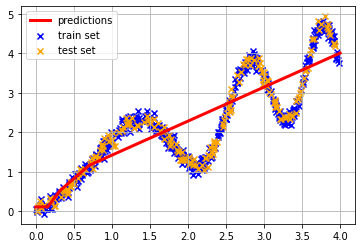

In [34]:
t = np.linspace(0, 4, 10000)  # on fabrique "tout" l'intervalle

pred = model2.predict(t)

fig, ax = plt.subplots()
ax.plot(t, pred, c='red', label='predictions', linewidth = 3)
ax.scatter(x_reg_train, y_reg_train, marker='x', label='train set', c='blue')
ax.scatter(x_reg_test, y_reg_test, marker='x', label='test set', c='orange')
ax.legend()
ax.grid()

---

### Classification en tensorflow

On passe maintenant à la classification. Le principe reste le même que pour la régression, avec trois différences : 
- En classification, on utilise comme `loss` (la fonction qu'on veut minimiser) l'entropie croisée, mais comme `metrics` (la valeur qu'on interprête / qu'on veut communiquer) l'`accuracy` (proportion de prédictions correctes). On utilisera ici `loss = tf.keras.losses.SparseCategoricalCrossEntropy()`
- Pour pouvoir utiliser l'entropie croisée, il faut en théorie utiliser le _one-hot_encoding_ des labels. En réalité, `tensorflow` gère cela automatiquement avec la  `SparseCategoricalCrossEntropy()`. 
- Lorsqu'on appelle `model.predict(x)`, on récupère _une distribution de probabilité sur l'ensemble des classes_ (donc un vecteur de taille `nombre_de_classes`). Pour récuperer une "vraie" prédiction, il faut faire `np.argmax(model.predict(x), axis=1)` (qui permet de sélectionner la classe qui a la plus haute probabilité estimée par le modèle). 

**Question 1:** Initialiser un réseau de neurone avec seulement deux layers : 
- Le premier envoie les observations en dimension 10, avec une activation `sigmoid`
- Le deuxième envoie les observation en dimension 3, avec une activation `softmax`. 

In [17]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,activation='sigmoid',input_shape=(2,)),   # mettez ici le premier layer
    tf.keras.layers.Dense(3,activation='softmax'),   # ici le second layer
])

---

**Question 2:** Pourquoi a-t-on pris une dimension de 3 pour la sortie du deuxième (et dernier) layer ? Pourquoi a-t-on pris l'activation `softmax` ?

Nous cherchons 3 probabilités représentants les 3 couleurs vu précédement

---

**Question 3:** Compilez votre modèle. On prendra toujours `'adam'` comme `optimizer`, mais on prendra comme indiqué la `SparseCategoricalCrossEntropy()` comme `loss`, et `['accuracy']` comme `metrics`.

In [18]:
model3.compile(
    optimizer='adam', 
    loss='SparseCategoricalCrossentropy', 
    metrics=['accuracy']
)

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 33        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


---

**Question 4:** Entraînez votre modèle sur 5 epochs, évaluez son score (sur le jeu de test), et commentez vos résultats. On fournit notamment une cellule de code pour visualiser l'ensemble des prédictions sur une grille $[-15, 15]\times[-5,5]$ de votre modèle après entraînement. 

In [19]:
model3.fit(x_classif_train, y_classif_train,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 695us/step - loss: 1.0431 - accuracy: 0.4620
Epoch 2/5
32/32 [==============================] - 0s 658us/step - loss: 0.9964 - accuracy: 0.5790
Epoch 3/5
32/32 [==============================] - 0s 765us/step - loss: 0.9554 - accuracy: 0.6400
Epoch 4/5
32/32 [==============================] - 0s 815us/step - loss: 0.9163 - accuracy: 0.6550
Epoch 5/5
32/32 [==============================] - 0s 824us/step - loss: 0.8789 - accuracy: 0.6590


In [20]:
model3.evaluate(x_classif_test, y_classif_test)

32/32 [==============================] - 0s 706us/step - loss: 0.8586 - accuracy: 0.6570


[0.8586252331733704, 0.6570000052452087]

Text(0.5, 1.0, "Prédictions du modèle (ombre) vs données d'entraînement")

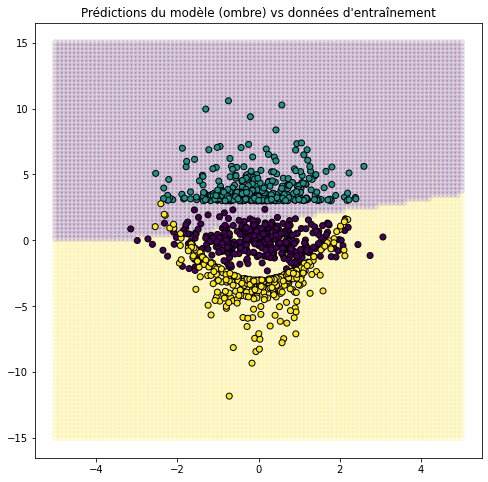

In [21]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-15, 15, 100)
grid = np.array(np.meshgrid(x,y)).reshape(2, 10000).T  # On fabrique une grille sur laquelle on va tester notre modèle
pred_proba = model3.predict(grid)  # on évalue notre modèle sur la grille --> donne des probabilité d'appartenance
predictions = np.argmax(pred_proba, axis=-1)  # On récupère nos prédictions sous forme de classes

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(grid[:,0], grid[:,1], c=predictions, alpha = 0.1)
ax.scatter(x_classif_train[:,0], x_classif_train[:,1], c=y_classif_train, marker='o', edgecolor='k', label="train set")
ax.set_title("Prédictions du modèle (ombre) vs données d'entraînement")

---

**Question 5:** Essayer d'améliorer votre score (train et test !) avec un modèle plus raffiné. Attention à l'_overfiting_!

Objectif : accuracy $> 94\%$ sur train et test. 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 33        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
32/32 [==============================] - 0s 737us/step - loss: 0.2917 - accuracy: 0.8980
Epoch 2/5
32/32 [==============================] - 0s 866us/step - loss: 0.2896 - accuracy: 0.8990
Epoch 3/5
32/32 [==============================] - 0s 973us/step - loss: 0.2884 - accuracy: 0.9020
Epoch 4/5
32/32 [==============================] - 0s 954us/step - loss: 0.2867 - accuracy: 0.9010
Epoch 5/5
32/32 [==============================] - 0s 615us/step - loss: 0.2998 - accuracy: 0.9050


Text(0.5, 1.0, "Prédictions du modèle (ombre) vs données d'entraînement")

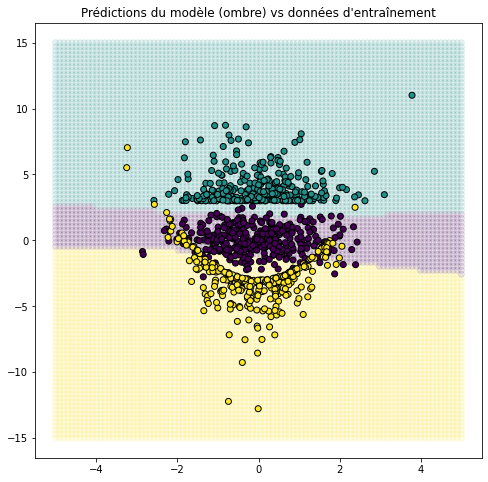

In [46]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,activation='sigmoid',input_shape=(2,)),   # mettez ici le premier layer
    tf.keras.layers.Dense(10,activation='sigmoid'),
    tf.keras.layers.Dense(3,activation='softmax'),   # ici le second layer
    tf.keras.layers.Dense(10,activation='softmax'),   # ici le second layer
    tf.keras.layers.Dense(3,activation='sigmoid'),
    tf.keras.layers.Dense(2,activation='sigmoid'),
    tf.keras.layers.Dense(3,activation='softmax'),   # ici le second layer
])
model3.compile(
    optimizer='adam', 
    loss='SparseCategoricalCrossentropy', 
    metrics=['accuracy']
)

model3.summary()
model3.fit(x_classif_train, y_classif_train,epochs=5)
model3.evaluate(x_classif_test, y_classif_test)

x = np.linspace(-5, 5, 100)
y = np.linspace(-15, 15, 100)
grid = np.array(np.meshgrid(x,y)).reshape(2, 10000).T  # On fabrique une grille sur laquelle on va tester notre modèle
pred_proba = model3.predict(grid)  # on évalue notre modèle sur la grille --> donne des probabilité d'appartenance
predictions = np.argmax(pred_proba, axis=-1)  # On récupère nos prédictions sous forme de classes

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(grid[:,0], grid[:,1], c=predictions, alpha = 0.1)
ax.scatter(x_classif_train[:,0], x_classif_train[:,1], c=y_classif_train, marker='o', edgecolor='k', label="train set")
ax.set_title("Prédictions du modèle (ombre) vs données d'entraînement")

---

## Partie 2 : Le jeu CIFAR10 et les réseaux convolutionnels

On va maintenant tester de nouvelles architectures sur un classique des jeux de données : le jeu `CIFAR10`. C'est un jeu de données représentant des images (attention il est un peu volumineux, essayez d'avoir un peu de place sur votre machine avant de lancer la cellule de code suivant qui le téléchargera). 

Les images ont $32 \times 32$ pixels et troix canaux de couleur (Rouge, Bleu, Vert) qui prennent des valuers entre $0$ et $255$, et qu'on va normaliser à $[0,1]$ pour simplifier. 

Ces images sont réparties dans 10 classes, dont les noms sont stockés dans la liste `noms_classes` ci-dessous :

In [23]:
noms_classes = ['avion', 'voiture', 'oiseau', 'chat', 'cerf',
               'chien', 'grenouille', 'cheval', 'bateau', 'camion']


In [24]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

170508288/170498071 [==============================] - 62s 0us/step


Text(0.5, 1.0, 'Image de grenouille')

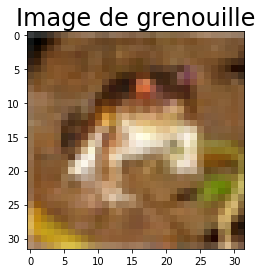

In [25]:
num = 0  # vous pouvez essayer d'autres num
image = x_train[num]
label = y_train[num]
plt.imshow(image, cmap='Greys')
plt.title('Image de %s' %noms_classes[label[0]], fontsize=24)

**Question 1:** En quelle dimension sont nos données ? 

la dimension de nos données est 32  *  32  *  3  *  10 =30720

---

**Question 2:** En reprenant le code de la Partie précédente, instanciez, entraînez puis évaluez un modèle fully-connected sur ce jeu de données.

**Important :** Le premier layer sera `tf.keras.layers.flatten()`, qui permet simplement de passer d'une image $32 \times 32 \times 3$ à un vecteur "ligne" (le type d'entrée que demande `tensorflow`). Le dernier avec une sortie de taille 10 (nombre de classes). 

Ne vous acharnez pas trop : avec un jeu de données difficile comme celui-ci, on se fixe dans un premier temps un objectif de $> 35\%$ de train **et** test accuracy. 


_Remarque :_ Comme le jeu de donnée est nettement plus gros, on peut généralement faire moins d'epochs (car 1 epoch ==> plus d'étapes de SGD à batch size fixée). Par contre les epochs seront plus longues. Commencez par en faire un petit nombre ($< 5$) pour voir ce que ça donne sur votre machine. 

_Remarque 2:_ Attention à l'overfiting ! En grande dimension, c'est très facile d'_overfit_. 

In [ ]:
# Écrivez votre code ici

---

**Question 3:** Combien votre modèle a-t-il de paramètres ?

In [ ]:
# Écrivez votre code ici

--- 

L'espace des _images naturelles_ (les "vraies" images qu'on est susceptible de voir dans la vie de tous les jours) est trop compliqué pour être appris avec un réseau de neurones aussi élémentaire, qui traite chaque pixel (et chaque canal de couleur !) de manière totalement indépendante. On va donc se reposer sur un [layer _convolutionnel_](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D).

On y accède via :

```
tf.keras.layers.Conv2D(filters, kernel_size, activation, input_shape)
```

où `filters` représente le nombre de filtres (nombre de matrices $A$ vu en cours) qu'on veut apprendre en parallèle, `kernel_size` représente la taille de ces filtres, `activation` est la fonction d'activation (mêmes choix que précédemment), et `input_shape` (utile pour le premier layer uniquement) permet de spécifier la taille des images (nombre de pixel x nombre de pixel x nombre de canaux).

On utilisera aussi le layer `tf.keras.layers.MaxPooling2D((n,n))` qui découpe l'image en patch de taille `n x n` (où `n` est un paramètre que vous choisissez) 

---

**Question 4:** Instancier un réseau avec les layers suivants : 
- Le premier est un layer convolutionnel avec 16 filtres de taille `(3,3)`, une activation `'relu'`, et on précisera l'`input_shape`. 
- Le second est un `MaxPooling2D` avec `n=2`. 
- Le troisième est un layer convolutionnel avec 32 filtres de taille `(3,3)` et une activation `'relu'`. 
- Le quatrième est un layer `Flatten()` pour récupérer des vecteurs ligne.
- Le dernier est un layer `Dense` avec une sortie de taille 10, et une activation `'softmax'`. 

In [ ]:
# Écrivez votre code ici

---

**Quesiton 5:** Compiler ce modèle, puis indiquer son nombre de paramètres. 

In [ ]:
# Écrivez votre code ici

---

**Question 6:** Entraînez et évaluez ce modèle sur le jeu de données `CIFAR10` en faisant 5 epochs. À quelle train et test accuracy arrivez-vous ? 

In [ ]:
# Écrivez votre code ici. 

---

**Question 7: (facultatif)** Améliorez ce modèle. Quelques points de repère : 
- Au dessus de $70\%$ : correct.
- Au dessus de $80\%$ : vraiment bien
- Au dessus de $85\%$ : très très bien
- Au dessus de $90\%$ : excellent, c'est plutôt un score qu'on atteint avec des méthodes plus sophistiquées d'habitude (comme les [ResNet](https://en.wikipedia.org/wiki/Residual_neural_network)). 
- Au dessus de $95\%$ : Hallucinant, ce sont des scores de modèles très récents de haut vol. 
- Au dessus de $99,2\%$ : nouveau record du monde !
- $100\%$ : Très douteux, sachant que [certains labels sont **faux**](https://franky07724-57962.medium.com/once-upon-a-time-in-cifar-10-c26bb056b4ce) (0.3% semble-t-il). 

In [ ]:
# Écrivez votre code ici